<a href="https://colab.research.google.com/github/AswinkumarGitHub/ML/blob/main/Face_Mask_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mask Detection Model For Single Face Image**

- **Download Pre-Trained Model and Haarcascades File**

In [ ]:
!wget https://github.com/kauravs1222/Face-Mask-Detector/blob/master/keras_model.h5?raw=true
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2022-07-08 07:29:28--  https://github.com/kauravs1222/Face-Mask-Detector/blob/master/keras_model.h5?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/aman-singh-kaurav/Face-Mask-Detector/blob/master/keras_model.h5?raw=true [following]
--2022-07-08 07:29:28--  https://github.com/aman-singh-kaurav/Face-Mask-Detector/blob/master/keras_model.h5?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aman-singh-kaurav/Face-Mask-Detector/raw/master/keras_model.h5 [following]
--2022-07-08 07:29:28--  https://github.com/aman-singh-kaurav/Face-Mask-Detector/raw/master/keras_model.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aman-singh-kaurav/Face-

- **Upload image from your Local Device**

In [ ]:
from google.colab import files
file=files.upload()

Saving maskon.jpg to maskon (1).jpg


- **Importing Libraries**

In [ ]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import cv2
import matplotlib.pyplot as plt

- **Load Pre-trained Model**

In [ ]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('keras_model.h5?raw=true', compile=False)

- **Or Using a webcam to capture images for processing on the runtime.**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='mask.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image as Image1
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image1(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

- **Take Image and Converts it**

*Change Image Path to the image you uploaded or clicked*

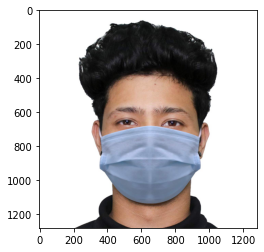

In [ ]:

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image_path = 'maskon.jpg'
image = Image.open(image_path)
normal = plt.imshow(image)
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

- **Predict the Image and Define Label**

In [ ]:
# run the inference
pred = model.predict(data)
prediction = pred.argmax(axis=-1)
#print(pred)
label = "Mask On" if prediction == 0 else "No Mask"
label = "{}: {:.2f}%".format(label, max(pred[0]) * 100)
color = (0, 255, 0) if prediction == 0 else (255, 0, 0)

- **Detect Face and make box**

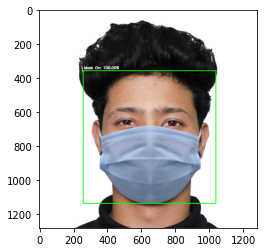

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#print(faces)

im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Creating Box for face
if(len(faces)!=0):
  for (x,y,w,h) in faces:
      cv2.rectangle(im_rgb,(x,y),(x+w,y+h),color, 4)
      #cv2.rectangle(im_rgb, (x,y), (x+w,y-35), color, cv2.FILLED)
      cv2.putText(im_rgb, label, (x+5, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2, cv2.LINE_AA)
   
else:
  cv2.rectangle(im_rgb, (5, 37), (220, 5), color, cv2.FILLED)
  cv2.putText(im_rgb, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2, cv2.LINE_AA)

#detected Image
detect = plt.imshow(im_rgb)